In [56]:
import numpy as np 
import torch 
import garch_framework as frame
from garch_framework.layers.losses import CorrectedNLoss
from garch_framework.utils.helpers import generate_ground_data, save_model_params, fit_figarch_parameters,compute_omega, compute_lambda_sequence
from garch_framework.utils.datasets import FIGARCHDataset
from garch_framework.models import FIGARCHModel
import matplotlib.pyplot as plt 
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
from torch.utils.data import Dataset
from arch import arch_model

In [57]:
# omega > 0 <- 1
# 0 <= d <= 1 <- 2
# 0 <= phi <= (1 - d) / 2 <- 2
# 0 <= beta <= d + phi <- 2

omega, d, phi, beta = 0.1, 0.5, 0.2, 0.3
truncation_size = 50

In [58]:
grounds = [omega, d, phi, beta]

In [59]:
data, volat = generate_ground_data(mode = 'FIGARCH',omega=omega, d=d, phi = phi,beta=beta, n=10000)

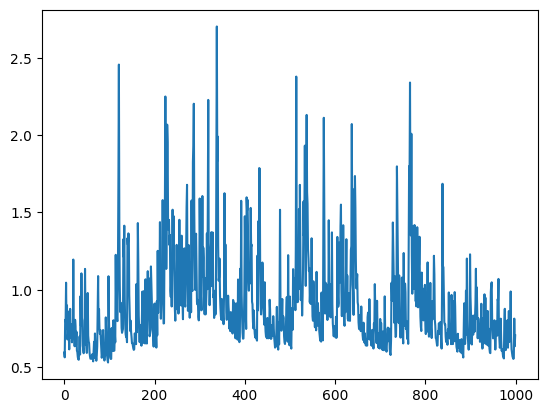

In [60]:
plt.plot(volat[:1000])

In [61]:
np.square(data[10])

0.023603704994091892

In [62]:
np.square(volat[10])

0.49755618268868956

In [63]:
dataset= FIGARCHDataset(data, volat, truncation_size=truncation_size, scale = 100)

In [64]:
for i in range(3):
    print(dataset[i])

(tensor([2.1765e-02, 8.6516e+01, 6.2386e+01, 1.7733e+02, 1.5481e+01, 1.0487e+02,
        4.1674e+00, 3.8164e+01, 9.2009e+01, 1.8736e+01, 2.3604e+00, 5.7558e+01,
        9.8658e+01, 1.9860e+01, 2.7559e+01, 6.1974e+01, 1.2619e+01, 4.9986e+01,
        2.7087e+01, 2.6945e+02, 3.9636e-01, 2.7998e+01, 5.4982e+00, 7.5627e+01,
        4.5377e+01, 5.6744e+00, 4.6783e+01, 4.3453e-03, 7.3326e+00, 1.9025e-01,
        6.3135e-05, 9.7800e-01, 1.5812e+01, 4.6873e+01, 1.2857e+00, 1.5541e+02,
        3.6616e+01, 2.1239e+02, 3.5199e+01, 5.6102e+01, 5.6349e-01, 8.6355e+00,
        4.1975e+00, 3.6049e+01, 4.4911e+01, 2.3359e+02, 2.5598e+01, 6.6058e-01,
        1.6123e+01, 2.4253e+00]), tensor(34.9908))
(tensor([8.6516e+01, 6.2386e+01, 1.7733e+02, 1.5481e+01, 1.0487e+02, 4.1674e+00,
        3.8164e+01, 9.2009e+01, 1.8736e+01, 2.3604e+00, 5.7558e+01, 9.8658e+01,
        1.9860e+01, 2.7559e+01, 6.1974e+01, 1.2619e+01, 4.9986e+01, 2.7087e+01,
        2.6945e+02, 3.9636e-01, 2.7998e+01, 5.4982e+00, 7.5627e+01,

In [65]:
len(dataset[0][0])

50

In [66]:
model = FIGARCHModel(truncation_size)
criterion = CorrectedNLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [67]:
dl = DataLoader(dataset, batch_size=500, shuffle=False, drop_last=False)

In [68]:
num_epochs = 100

for epochs in tqdm(range(num_epochs), desc="Training"):
    epoch_loss =0.0
    model.train()

    for inputs, resids in dl:
        optimizer.zero_grad()
        output = model(inputs)
        loss = criterion(output, resids)
        loss.backward()
        optimizer.step()
        
        epoch_loss+=loss.item()

    avg_loss = epoch_loss/len(dl)
    

    
    tqdm.write(f"Epoch {epochs+1}/{num_epochs} | Loss: {avg_loss:.4f} | LR: {optimizer.param_groups[0]['lr']:.2e}")


Training:   0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100 | Loss: 4.0769 | LR: 1.00e-03
Epoch 2/100 | Loss: 4.0669 | LR: 1.00e-03
Epoch 3/100 | Loss: 4.0566 | LR: 1.00e-03
Epoch 4/100 | Loss: 4.0460 | LR: 1.00e-03
Epoch 5/100 | Loss: 4.0351 | LR: 1.00e-03
Epoch 6/100 | Loss: 4.0238 | LR: 1.00e-03
Epoch 7/100 | Loss: 4.0121 | LR: 1.00e-03
Epoch 8/100 | Loss: 4.0000 | LR: 1.00e-03
Epoch 9/100 | Loss: 3.9874 | LR: 1.00e-03
Epoch 10/100 | Loss: 3.9744 | LR: 1.00e-03
Epoch 11/100 | Loss: 3.9608 | LR: 1.00e-03
Epoch 12/100 | Loss: 3.9467 | LR: 1.00e-03
Epoch 13/100 | Loss: 3.9320 | LR: 1.00e-03
Epoch 14/100 | Loss: 3.9166 | LR: 1.00e-03
Epoch 15/100 | Loss: 3.9005 | LR: 1.00e-03
Epoch 16/100 | Loss: 3.8836 | LR: 1.00e-03
Epoch 17/100 | Loss: 3.8658 | LR: 1.00e-03
Epoch 18/100 | Loss: 3.8470 | LR: 1.00e-03
Epoch 19/100 | Loss: 3.8271 | LR: 1.00e-03
Epoch 20/100 | Loss: 3.8061 | LR: 1.00e-03
Epoch 21/100 | Loss: 3.7836 | LR: 1.00e-03
Epoch 22/100 | Loss: 3.7595 | LR: 1.00e-03
Epoch 23/100 | Loss: 3.7337 | LR: 1.00e-03
Epoch 24/100 | Loss:

In [69]:
model_params = model.get_params()[::-1]

In [70]:
trunc = 15

In [71]:
model_params = model_params[:trunc]

In [72]:
#model_params = model_params[]

In [73]:
model_params

array([0.41815427, 0.11615316, 0.05197711, 0.03462586, 0.02641016,
       0.02258699, 0.01941926, 0.01718292, 0.01620667, 0.01535478,
       0.01538132, 0.01548128, 0.01449256, 0.01363793, 0.01321839],
      dtype=float32)

In [74]:
compute_lambda_sequence(d, phi, beta, truncation_size)

array([0.4       , 0.145     , 0.081     , 0.0508625 , 0.03479   ,
       0.02547606, 0.01965454, 0.01576575, 0.01302135, 0.01099793,
       0.00945363, 0.00824213, 0.00727031, 0.00647628, 0.00581741,
       0.00526343, 0.0047923 , 0.00438762, 0.00403693, 0.00373066,
       0.00346129, 0.00322288, 0.00301065, 0.00282076, 0.00265004,
       0.00249588, 0.00235612, 0.00222894, 0.00211281, 0.00200643,
       0.00190869, 0.00181864, 0.00173546, 0.00165843, 0.00158694,
       0.00152044, 0.00145847, 0.00140059, 0.00134644, 0.0012957 ,
       0.00124806, 0.00120328, 0.00116111, 0.00112134, 0.0010838 ,
       0.00104831, 0.00101471, 0.00098287, 0.00095266])

In [75]:
learned_params = fit_figarch_parameters(model_params, trunc)[0] #С параметрами все ок - а вот МНК при оценке явно не работает

In [76]:
learned_params

(0.36968109403361865, 0.3514269831429915, 0.3032495170354124)

In [77]:
omega = compute_omega(model_params, np.square(data), np.square(volat), trunc=5)

In [78]:
omega

0.47506757068760946

In [79]:
data2, volat2 = np.square(data), np.square(volat)

In [80]:
save_model_params(model="FIGARCH", filename="test_figarch.json", ground_truth=grounds, model_params=model_params, residuals_squared=data2, volatility=data2)